<a href="https://colab.research.google.com/github/adorahelen/StartAI/blob/main/Hello_World(mnist_deeplearning_ipynb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255
print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [ ]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)




* 입력층의 뉴런의 수는 784
  은닉층 1 : 512
  은닉층 2 : 256
  출력층 : 10

  {여기서부터 인공지능 모델 설계}  

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 

인공지능 모델을 시퀸셜 방식으로 개발한다.

= 케라스는 이러한 형태의 딥러닝 모델을 쉽게 개발하게 도와줌

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=11, verbose=1)

Epoch 1/11
469/469 [==============================] - 7s 3ms/step - loss: 0.2246 - accuracy: 0.9345
Epoch 2/11
469/469 [==============================] - 2s 4ms/step - loss: 0.0821 - accuracy: 0.9744
Epoch 3/11
469/469 [==============================] - 2s 4ms/step - loss: 0.0526 - accuracy: 0.9839
Epoch 4/11
469/469 [==============================] - 2s 3ms/step - loss: 0.0344 - accuracy: 0.9890
Epoch 5/11
469/469 [==============================] - 2s 4ms/step - loss: 0.0271 - accuracy: 0.9912
Epoch 6/11
469/469 [==============================] - 2s 3ms/step - loss: 0.0216 - accuracy: 0.9930
Epoch 7/11
469/469 [==============================] - 2s 3ms/step - loss: 0.0193 - accuracy: 0.9936
Epoch 8/11
469/469 [==============================] - 2s 3ms/step - loss: 0.0143 - accuracy: 0.9952
Epoch 9/11
469/469 [==============================] - 2s 4ms/step - loss: 0.0150 - accuracy: 0.9950
Epoch 10/11
469/469 [==============================] - 2s 4ms/step - loss: 0.0131 - accuracy: 0.9955

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0916 - accuracy: 0.9774
Test score: 0.09158694744110107
Test accuracy: 0.977400004863739


In [ ]:
predicated_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicated_classes == y_test)[0]
incorrect_indices = np.nonzero(predicated_classes != y_test)[0]


313/313 [==============================] - 1s 1ms/step


<ipython-input-13-307095991bff>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3, i+1)


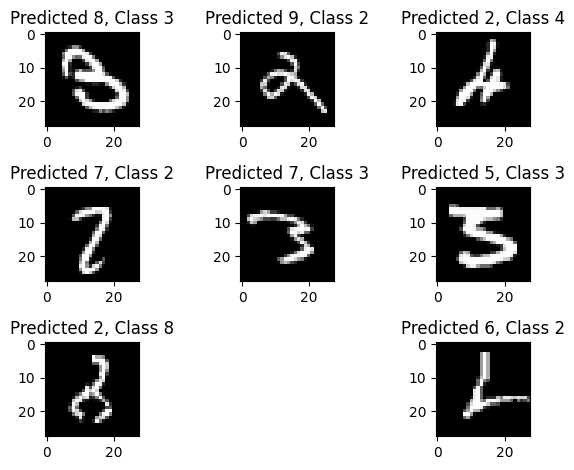

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3, i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
  plt.title("Predicted {}, Class {}". format(predicated_classes[incorrect], y_test[incorrect]))
  plt.tight_layout()